

# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  this data contains of 100k medical appoinments that determine wheather the paitent showed up or not.this data include extra inforamtion such as gender,age,ScheduledDay.and information about some diseases such as hypertension, diabetes, alcoholism, handicap.

Research Questions:

*1- is there is a relation between age and attendence?
*2- Who has the highest attendance rates for men or women?



In [63]:

import numpy as np
import pandas as pd 
from matplotlib.pyplot import *
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [64]:
#load data to dataframe
df=pd.read_csv('noshowappointments-kagglev2-may-2016 - Copy.csv',index_col=0)
df.head(5)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [65]:

#summary statistics 
df.describe()


,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [66]:
#check for null values 
df.isnull().sum()


AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

there is no nullvalues

In [67]:
#check for dublicated values 
df.duplicated().sum()

0

there is no duplicated values

In [68]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


# problems:|
there is no major problems as data is tend to be very clean but there is some problem :
1-some columns will be removed as its considersd not useful 
2-convert NO_show to int
3-convert ScheduledDay to datetime


In [69]:
#remove unused data 
df.drop(['AppointmentDay','AppointmentID','Scholarship','AppointmentID'], inplace=True, axis=1)

In [70]:
#check for data 
df.head(7)

,Gender,ScheduledDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,
2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,1,0,0,0,0,No
5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,No
4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,No
8.679512e+11,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
8.841186e+12,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,1,1,0,0,0,No
9.598513e+13,F,2016-04-27T08:36:51Z,76,REPÚBLICA,1,0,0,0,0,No
7.336882e+14,F,2016-04-27T15:05:12Z,23,GOIABEIRAS,0,0,0,0,0,Yes


In [71]:
#transform No-show to int (1,0)
df['No-show'].replace({'No': 0, 'Yes': 1}, inplace = True)



In [72]:
#create a mask
showed = df['No-show'] == 0
notshowen = df['No-show'] == 1
df['showed'] = showed
df['notshowen'] = notshowen

In [73]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   ScheduledDay   110527 non-null  object
 2   Age            110527 non-null  int64 
 3   Neighbourhood  110527 non-null  object
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  int64 
 10  showed         110527 non-null  bool  
 11  notshowen      110527 non-null  bool  
dtypes: bool(2), int64(7), object(3)
memory usage: 9.5+ MB


In [52]:
#convert ScheduledDay to datetime
df['ScheduledDay'] =pd.to_datetime(df['ScheduledDay'])

In [74]:
#check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   ScheduledDay   110527 non-null  object
 2   Age            110527 non-null  int64 
 3   Neighbourhood  110527 non-null  object
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  int64 
 10  showed         110527 non-null  bool  
 11  notshowen      110527 non-null  bool  
dtypes: bool(2), int64(7), object(3)
memory usage: 9.5+ MB


In [75]:
df.to_csv('noshowappointments_cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (number of people who showed up vs number of people who not)

In [76]:
#value counts for NO-SHOW 
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

so  88208 apper in there appoinments and 22319 had not!

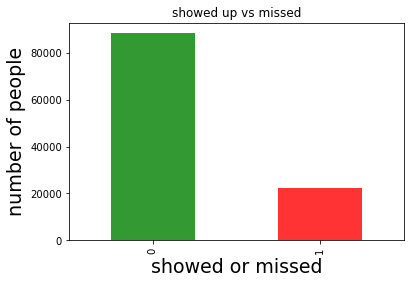

In [77]:
#bar chart for showed up vs not showed up
df['No-show'].value_counts().plot(kind='bar',color=['green','red'],title='showed up vs missed',alpha=.8);
plt.xlabel("showed or missed",fontsize=19);

plt.ylabel("number of people",fontsize=19);

0 stands for shown 
1 stands for not


### Research Question 2  (what is the major factor in showing_up)


In [78]:
df.Age[showed].mean()


37.790064393252315

In [58]:

df.Age[notshowen].mean()


34.31766656212196

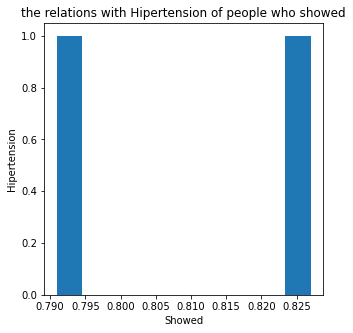

In [79]:
df.groupby('Hipertension')['showed'].mean().plot(kind='hist',label='show',figsize=(5,5));
plt.xlabel("Showed")
plt.ylabel("Hipertension")
plt.title("the relations with Hipertension of people who showed");



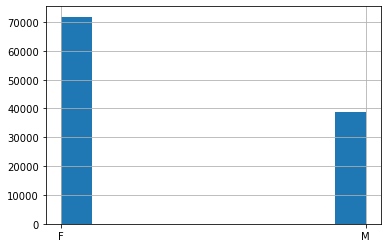

In [86]:
#1D graph in gender 
df['Gender'].hist();

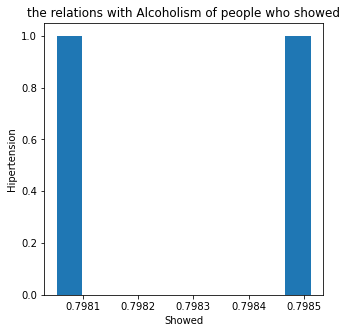

In [81]:
df.groupby('Alcoholism')['showed'].mean().plot(kind='hist',label='show',figsize=(5,5));
plt.xlabel("Showed")
plt.ylabel("Hipertension")
plt.title("the relations with Alcoholism of people who showed");



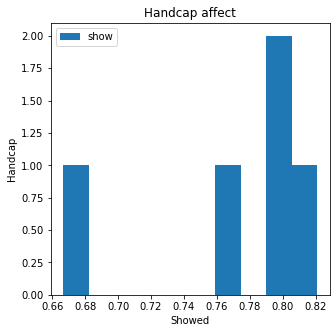

In [82]:
df.groupby('Handcap')['showed'].mean().plot(kind='hist',label='show',figsize=(5,5));
plt.xlabel("Showed")
plt.ylabel("Handcap")
plt.title("Handcap affect")
plt.legend();


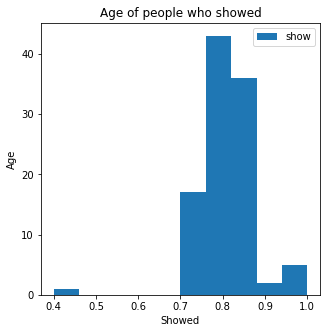

In [83]:
df.groupby('Age')['showed'].mean().plot(kind='hist',label='show',figsize=(5,5));
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend();


the main age is below 40

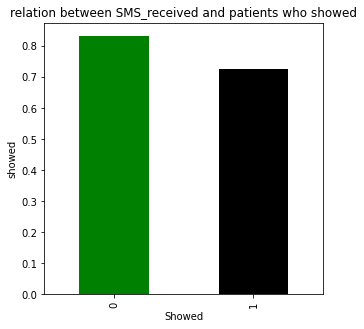

In [42]:
#find the relation between age and patients who showed
df.groupby('SMS_received')['showed'].mean().plot(kind='bar',color=['green','black'],figsize=(5,5),label='sms');
plt.xlabel("Showed")
plt.ylabel("showed")
plt.title("relation between SMS_received and patients who showed");


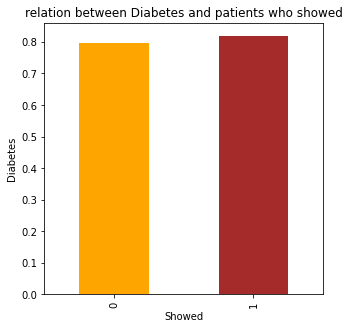

In [46]:
#find the relation between gender and patients who showed
df.groupby('Diabetes')['showed'].mean().plot(kind='bar',color=['orange','brown'],figsize=(5,5),label='sms');
plt.xlabel("Showed")
plt.ylabel("Diabetes")
plt.title("relation between Diabetes and patients who showed");


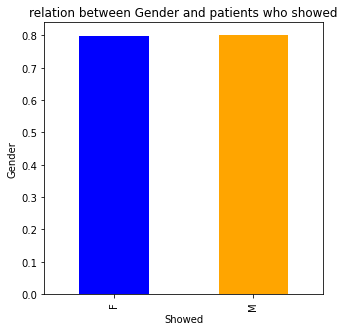

In [44]:
df.groupby('Gender')['showed'].mean().plot(kind='bar',color=['blue','orange'],figsize=(5,5),label='sms');
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed");


Men are more persistent to get to the appionments


# Limitations:
there are some missing values such as the price,the appoinments is affordable or not..

<a id='conclusions'></a>
## Conclusions

* there are avery strong relation between sms_reminder and people that showed_up so it suppose to send sms-message regulary
*the number of people that showed up is 88208 or 77.2% and not showen_up is 22319 or 22.8%
*men are more persistent to go to the appoinments
*age is the most important factor.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1